In [33]:
import pandas as pd
import gzip
from tqdm import tqdm
from datetime import datetime
from datetime import date, time
from dateutil.parser import parse
import numpy as np
from bokeh.plotting import figure, show
from bokeh.models import DatetimeTickFormatter
from bokeh.plotting import figure, show, output_notebook


# Introduction:

# Metadata :

# Reviews:

## Downloading the data :
We start with the Amazon_Instant_Video (5-core) data because it is the smallest 
we can put them in a pandas dataframe 

In [34]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in tqdm(parse(path)):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')
# GET THE DATA 

df = getDF('reviews_Amazon_Instant_Video_5.json.gz')
df.head()

37126it [00:02, 17022.51it/s]


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2.0,A little bit boring for me,1399075200,"05 3, 2014"
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5.0,Excellent Grown Up TV,1346630400,"09 3, 2012"
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1.0,Way too boring for me,1381881600,"10 16, 2013"
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4.0,Robson Green is mesmerizing,1383091200,"10 30, 2013"
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5.0,Robson green and great writing,1234310400,"02 11, 2009"


Both the reviewer and the product are identified by codes,respectively `reviewerID`and `asin`.We also have the actual name of the reviewer.
The text of the reviews as well as the corresponding summaries are represented by strings.
Each review is characterized by: 
- the name and the identification of the reviewer
- the identification of the product
- a text and a summary 
- an overall rating score
- a list of two items giving thethe number of people that found the review usefuland the total number of people who read it.
- the review time , given both in unix 

In [35]:
#the dates are initially strings --> convert them to datetime format 
df.reviewTime=pd.to_datetime(df.reviewTime)

In [ ]:
# looking at the data : type /missing values 

## Variables
enrich the dataframe with new variables 

In [ ]:
#other values than the number of review for each date :number of reviewers (up to that year)? length of reviews ? length of summary ?
#takes a very long time (too long -> think of something else to do this)
df['length_review']=list(map(lambda x:len(x),df.reviewText))
df['length_title_reviews']=list(map(lambda x:len(x),df.summary))
df['number of reviewers']=list(map(lambda x:len(df[df.year<=x].reviewerID.unique()),df.year))
df

## Prepare the functions 

## plot the data in time
We plot the daily number of reviews through the years 

In [27]:
# through the whole timeline 
evolution = df.groupby('reviewTime').count()

# output to static HTML file
#output_file("Videos_evolution.html", title="Evolution of the number of reviews through the years")
output_notebook()
# create a new plot with a a datetime axis type
p = figure(width=1000, height=500, x_axis_type="datetime")

# add renderers
avg=evolution.asin.rolling(182,center=True).mean() # moving average to have something smoother
p.line(evolution.index.values,evolution.asin, color='navy')
p.line(evolution.index.values,avg, color='red')
# NEW: customize by setting attributes
p.title.text = "Daily Number of Reviews"
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Number of reviews'
p.xaxis[0].formatter = DatetimeTickFormatter(days='%m/%d',years='%Y',months='%B')
# show the results
show(p)

Loading BokehJS ...

### dividing the data by year 


In [36]:
#extract the year alone
df['year']=list(map(lambda x: x.year, df['reviewTime']))

df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,year
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2.0,A little bit boring for me,1399075200,2014-05-03,2014
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5.0,Excellent Grown Up TV,1346630400,2012-09-03,2012
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1.0,Way too boring for me,1381881600,2013-10-16,2013
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4.0,Robson Green is mesmerizing,1383091200,2013-10-30,2013
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5.0,Robson green and great writing,1234310400,2009-02-11,2009


In [50]:
#create a timeline to view the number of reviews for each year : 
#we initialize the dataframe with all the days of the year : 
#(we choose 2008 because it is bisextile , but the year itself doesn't count)
Count=pd.DataFrame(pd.date_range('01-01-2008','31-12-2008'),columns=['dates'])
Count['dates']=list(map(lambda x:x.strftime('%m-%d'), Count['dates']))

In [51]:
def yearly_count (Y,Count):
    data = df[df.year==Y].groupby('reviewTime').count()
    frequency=data[['asin']].copy()
    frequency.columns=['year'+str(Y)]
    frequency['dates']=list(map(lambda x:x.strftime('%m-%d'), frequency.index))
    Count=pd.merge(Count,frequency,'outer')
    Count=Count.fillna(0)
    return Count


In [52]:
Years = sorted(df.year.unique())
for y in Years:
    Count=yearly_count(y,Count)
#same comment as above for 2008
Count.dates=pd.to_datetime('2008-'+Count.dates)
Count.head()

,dates,year2000,year2004,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014
0,2008-01-01,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,14.0,54.0
1,2008-01-02,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,24.0,47.0
2,2008-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,27.0,114.0
3,2008-01-04,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,43.0,96.0
4,2008-01-05,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,11.0,75.0


In [53]:
#monthly average number of reviews for each year :
Count['month']=list(map(lambda x: x.month, Count['dates']))
month_average=Count.groupby('month').median()
month_average['time']=list(map(lambda x: pd.to_datetime('15-'+str(x)+'-2008'), month_average.index.values))

month_average

,year2000,year2004,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,time
month,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,21.0,70.0,2008-01-15
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,27.0,124.0,2008-02-15
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,27.0,86.0,2008-03-15
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,36.0,56.5,2008-04-15
5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,35.0,55.0,2008-05-15
6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,29.5,50.5,2008-06-15
7,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,6.0,36.0,49.0,2008-07-15
8,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,7.0,37.0,0.0,2008-08-15
9,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,8.5,43.0,0.0,2008-09-15


In [77]:

# output to static HTML file
#output_file("Videos_Number.html", title="Number of reviews")

# create a new plot with a a datetime axis type
p = figure(width=1000, height=500, x_axis_type="datetime")

# add renderers
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
for k in range(5,len(Years)):
    y=Years[k]
    col='year'+str(y)
    p.circle(Count.dates,Count[col], size=4,color=colors[-k], alpha=0.8,legend=str(y))
# NEW: customize by setting attributes
p.title.text = "Number of reviews by day"
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Number of reviews'
p.xaxis[0].formatter = DatetimeTickFormatter(days='%m/%d',years='',months='%B')
# show the results
show(p)

Loading BokehJS ...

In [78]:
# output to static HTML file
#output_file("Videos_Average.html", title="Average number of reviews ")

# create a new plot with a a datetime axis type
p = figure(width=1000, height=500, x_axis_type="datetime")

# add renderers
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
for k in range(5,len(Years)):
    y=Years[k]
    col='year'+str(y)
    p.line(month_average['time'],month_average[col], color=colors[-k],legend=str(y))

# NEW: customize by setting attributes
p.title.text = "Average Number of reviews by month"
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Average Number of reviews'
p.xaxis[0].formatter = DatetimeTickFormatter(days='%m/%d',years='',months='%B')
# show the results
show(p)

- make it more interactive 
- choose the year 
- compute the average/max/min over all the years 
- hover and view the value 
- why does it take so long ?!

In [40]:
table=pd.DataFrame(pd.date_range('01-01-2008','31-12-2008'),columns=['dates'])
table['dates']=list(map(lambda x:x.strftime('%m-%d'), table['dates']))

In [38]:

def variable_year (Y,variable,table):
    data = df[df.year==Y].groupby('reviewTime').mean()
    frequency=data[[variable]].copy()
    frequency.columns=['year'+str(Y)]
    frequency['dates']=list(map(lambda x:x.strftime('%m-%d'), frequency.index))
    table=pd.merge(table,frequency,'outer')
    table=table.fillna(0)
    return table


In [42]:
Years = sorted(df.year.unique())
for y in Years:
    table=variable_year(y,'overall',table)
#same comment as above for 2008
table.dates=pd.to_datetime('2008-'+table.dates)
table.head()

,dates,year2000,year2004,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014
0,2008-01-01,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,3.750000,4.071429,4.314815
1,2008-01-02,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,4.250000,4.666667,4.361702
2,2008-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.500000,4.185185,4.298246
3,2008-01-04,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.000000,4.302326,4.395833
4,2008-01-05,0.0,0.0,0.0,0.0,0.0,4.0,5.0,5.0,3.333333,4.454545,4.306667


## the products 

In [49]:
products = df.groupby('asin').count()
number_of_reviews =products['overall']

number_of_reviews.head()

asin
B000H00VBQ     6
B000H0X79O     5
B000H29TXU     5
B000H2DMME    10
B000H4YNM0    24
Name: overall, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11227e940>]], dtype=object)

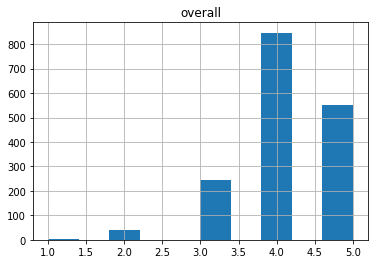

In [50]:
%matplotlib inline
#Now we see the distribution of overall score for each product 
products = df.groupby('asin').mean().round()
products=products[['overall']]
products.hist()

In [52]:
#We can isolate a product by his ID:
product = df[df.asin=='B00L86ZKAK'].copy()
product=product.sort_values('reviewTime')
product.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,year
36999,A3KV5PN9P44YG0,B00L86ZKAK,Melanie,"[2, 4]",One of my fav shows,5.0,Five Stars,1404345600,2014-07-03,2014
36976,AJT9NDFFCC5M9,B00L86ZKAK,gabbygirl,"[2, 3]",Different from most TV and a great escape from...,4.0,Magnetic Magic,1404691200,2014-07-07,2014
36957,A1X321SRVI41S3,B00L86ZKAK,Angel Mom,"[2, 4]","Love it. The suspense the drama, the cliff han...",5.0,Love it. The suspense the drama,1404691200,2014-07-07,2014
36959,A17WNTA00WZ65L,B00L86ZKAK,Betsy Bree,"[4, 7]",Even though the first episode was written by S...,2.0,Silly Stuff,1404691200,2014-07-07,2014
37006,A18HE80910BTZI,B00L86ZKAK,"rbhatta ""A Dinosaur you can trust!""","[1, 2]",Did the producer have tough time keeping the o...,2.0,Why kill old stars?,1404691200,2014-07-07,2014


In [53]:
#for each product,we define new variables of interest:
#some are stored in a dictionary 
info={'1-id_product':product.asin.unique()[0]}
info['3-rating_average'] = product.overall.mean()
info['2-number_reviewers'] =len(product.reviewerID.unique())
#number of positive reviews
#number of negative reviews
#average sentiment score

info

{'1-id_product': 'B00L86ZKAK',
 '2-number_reviewers': 71,
 '3-rating_average': 3.619718309859155}

In [35]:
#view any variable of interest on a timeline 
#(we need to compute the average in case we have many observations for the same day)
def product_timeline (variable):
    p = figure(width=1000, height=500, x_axis_type="datetime")
    avg=product.groupby('reviewTime').mean() # We compute the mean for each date 
    p.line(avg.index.values,avg[variable], color='navy')
    p.title.text = "Product Reviews"
    p.xaxis.axis_label = 'Date'
    show(p)

In [44]:
product_timeline('length_review')

## Interpretation 

# Conclusion